In [2]:
#Winning Factor 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


print('Import Done')


Import Done


In [3]:
df = pd.read_csv(r"C:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\EDA\Mercedes_Feature_Table.csv", sep=';')
print("Feature_Table:", df.columns.tolist())

Feature_Table: ['CONSTRUCTOR_NAME', 'DRIVER_NAME', 'DRIVER_NATIONALITY', 'ROUND', 'SEASON', 'CIRCUIT_NAME', 'LOCATION', 'COUNTRY', 'GRID', 'POSITION', 'STATUS', 'POINTS', 'LAPS', 'TIME', 'TIME_IN_MILLISECONDS', 'Q1_IN_MILLISECONDS', 'Q2_IN_MILLISECONDS', 'Q3_IN_MILLISECONDS', 'PIT_COUNT', 'AVG_PIT_DURATION', 'TOTAL_PIT_TIME']


In [4]:
numeric_df = df.select_dtypes(include='number')

numeric_df

,ROUND,SEASON,GRID,POSITION,POINTS,LAPS,TIME_IN_MILLISECONDS,Q1_IN_MILLISECONDS,Q2_IN_MILLISECONDS,Q3_IN_MILLISECONDS,PIT_COUNT,AVG_PIT_DURATION,TOTAL_PIT_TIME
0,2,2011,11,9,2.0,56,5944728,3064000.0,2255000.0,NaN,3,22.3547,67.064
1,3,2011,4,5,10.0,56,5831674,2372000.0,2950000.0,2710000.0,3,21.1653,63.496
2,3,2011,14,8,4.0,56,5849252,2608000.0,2617000.0,NaN,3,21.2953,63.886
3,4,2011,3,5,10.0,58,5465097,2134000.0,2301000.0,2074000.0,4,21.1893,84.757
4,4,2011,8,12,0.0,58,5503002,2317000.0,1681000.0,2206000.0,4,23.0162,92.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,22,2024,10,2,18.0,50,4933282,2205000.0,2487000.0,2986000.0,2,21.2110,42.422
481,23,2024,1,4,12.0,57,5479427,1501000.0,1329000.0,1775000.0,4,29.2448,116.979
482,23,2024,6,12,0.0,57,5521445,1897000.0,1355000.0,1271000.0,4,27.7118,110.847
483,24,2024,16,4,12.0,58,5229774,2267000.0,NaN,NaN,1,21.6940,21.694


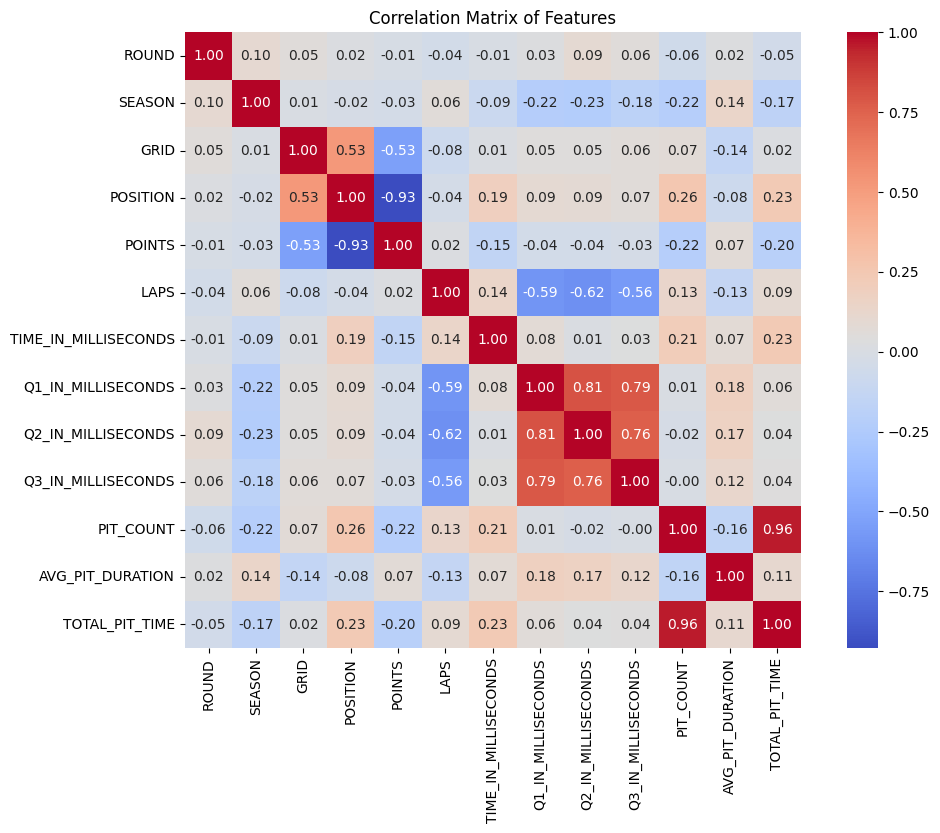

In [5]:
#Correlation matrix
corr = numeric_df.corr()

#Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()


In [7]:
y = df['POSITION'].apply(lambda x: 1 if x == 1 else 0)  #1 meaning the driver won


features = [
    'GRID',
    'TOTAL_PIT_TIME',
    'AVG_PIT_DURATION',
    'TIME_IN_MILLISECONDS'
]

X = df[features]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
log = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)


In [9]:


ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('log', log),
        ('svc', svc)
    ],
    voting='soft'  
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)


In [10]:
from sklearn.metrics import classification_report

print("Voting Ensemble Model Performance:\n")
print(classification_report(y_test, y_pred))


Voting Ensemble Model Performance:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.73      0.44      0.55        36

    accuracy                           0.82       146
   macro avg       0.78      0.69      0.72       146
weighted avg       0.81      0.82      0.81       146



In [11]:
for name, model in [('Random Forest', rf), ('Gradient Boosting', gb), ('Logistic Regression', log), ('SVC', svc)]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name}:\n")
    print(classification_report(y_test, preds))



Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.59      0.44      0.51        36

    accuracy                           0.79       146
   macro avg       0.71      0.67      0.69       146
weighted avg       0.77      0.79      0.78       146


Gradient Boosting:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.64      0.50      0.56        36

    accuracy                           0.81       146
   macro avg       0.75      0.70      0.72       146
weighted avg       0.80      0.81      0.80       146


Logistic Regression:

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       110
           1       0.67      0.39      0.49        36

    accuracy                           0.80       146
   macro avg       0.75      0.66      0.68       146
weighted avg 

c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 